In [ ]:
# data fetching
import os
import cx_Oracle

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# os.environ['NLS_LANG'] = 'SIMPLIFIED CHINESE_CHINA.UTF8'
# os.environ['NLS_LANG'] = 'SIMPLIFIED CHINESE_SINGAPORE.ZHT16GBK'
# os.environ['NLS_LANG'] = 'AMERICAN_AMERICA.WE8MSWIN1252'
os.environ['NLS_LANG'] = 'ENGLISH_UNITED KINGDOM.AL32UTF8'

sns.set_style('whitegrid',{'font.sans-serif':['Arial','Arial']})

# Oracle client environment variable
os.putenv('ORACLE_HOME', "C:\\app\oracle\\client11g\\product\\11.2.0\\client_2")
os.putenv('LD_LIBRARY_PATH', "C:\\app\\oracle\\client11g\\product\\11.2.0\\client_2\\lib")

# connect security information

user_id = 'APAC_FIN_COMP_MART'
pass_wd = 'not_apac_fin_comp'

In [2]:
# GODW server tns
dsn_tns = cx_Oracle.makedsn('exak-scan.kau.roche.com', 15210, service_name='OTHER_GODWP.KAU.ROCHE.COM')

connection = cx_Oracle.connect(user_id, pass_wd, dsn_tns)

# General information about the YF DM_F_YF_CM_SRC table
Yellow flag table contain 626811 records for 1753

In the table, the latest report date is 2017-5-29

In [3]:
SQL = "select count(1) as T_NUM_1753 from DM_F_YF_CM_SRC where COMPANY_CODE = '1753'"
df_ora = pd.read_sql(SQL, con=connection)
print(df_ora)

   T_NUM_1753
0      726034


In [4]:
SQL = "select distinct(report_date) from DM_F_YF_CM_SRC where COMPANY_CODE = '1753' order by REPORT_DATE"
df_ora = pd.read_sql(SQL, con=connection)
print(df_ora)

    REPORT_DATE
0    2017-05-29
1    2017-05-31
2    2017-06-01
3    2017-06-13
4    2017-06-15
5    2017-06-16
6    2017-06-22
7    2017-06-28
8    2017-06-30
9    2017-07-04
10   2017-07-05
11   2017-07-07
12   2017-07-10
13   2017-07-11
14   2017-07-12
15   2017-07-13
16   2017-07-14
17   2017-07-17
18   2017-07-18
19   2017-07-19
20   2017-07-20
21   2017-07-21
22   2017-07-24
23   2017-07-25
24   2017-07-26
25   2017-07-27
26   2017-07-28
27   2017-07-31
28   2017-08-01
29   2017-08-02
..          ...
107  2017-11-21
108  2017-11-22
109  2017-11-23
110  2017-11-24
111  2017-11-27
112  2017-11-28
113  2017-11-29
114  2017-11-30
115  2017-12-01
116  2017-12-04
117  2017-12-05
118  2017-12-06
119  2017-12-07
120  2017-12-08
121  2017-12-11
122  2017-12-12
123  2017-12-13
124  2017-12-14
125  2017-12-15
126  2017-12-18
127  2017-12-19
128  2017-12-20
129  2017-12-21
130  2017-12-22
131  2017-12-25
132  2017-12-26
133  2017-12-27
134  2017-12-28
135  2017-12-29
136  2018-01-01

[137 ro

In [5]:
SQL = """
Select
        EXP_TYPE                ,
        EMPLOYEE_NAME           ,
        EMPLOYEE_ID             ,
        EMPLOYEE_COUNTRY_CODE   ,
        RPT_NAME                ,
        COMPANY_NAME            ,
        RPT_COUNTRY_CODE        ,
        COMPANY_CODE            ,
        RPT_CC_CODE             ,
        RPT_LEGACY_KEY          ,
--        RPT_ID                  ,
        FIRST_SUBMITTED_DATE    ,
        LAST_SUBMITTED_DATE     ,
--       IS_SENT_BACK            ,
        SENT_BACK_CODE          ,
--      SENT_BACK_TEXT          ,
        APPROVAL_STATUS         ,
        PAYMENT_DATE            ,
        TRANSACTION_NO          ,
        ORG_5_NAME              , -- Org information
--        ORG_5_CODE              ,
--        PEER_ID                 ,
        T_DATE                  ,
        PAYMENT_TYPE            ,
        VENDOR                  ,
        LOCATION                ,
        T_CURRENCY              ,
        T_AMT                   ,
        RATE                    ,
        REIMBUR_CURRENCY        ,
        REIMBUR_AMT             ,
        CLAIMED_AMT             ,
        APPROVED_AMT            ,
        INVOICE_NUMBER          ,
        CHRIS_ID                ,
        REPORT_DATE             ,
        PERSONAL                ,
        REROUTE_CLAIM_FLAG   
       from DM_F_YF_CM_SRC where COMPANY_CODE = '1753'
       FETCH FIRST 50000 ROWS ONLY
      """

DM_F_YF_CM_SRC_DF = pd.read_sql(SQL, con=connection)
print(DM_F_YF_CM_SRC_DF.head())

                  EXP_TYPE          EMPLOYEE_NAME EMPLOYEE_ID  \
0  Business Meal with HCPs  Liu (刘), Yingjie (英杰)      763683   
1  Business Meal with HCPs  Liu (刘), Yingjie (英杰)      763683   
2  Business Meal with HCPs  Liu (刘), Yingjie (英杰)      763683   
3  Business Meal with HCPs  Liu (刘), Yingjie (英杰)      763683   
4  Business Meal with HCPs  Liu (刘), Yingjie (英杰)      763683   

  EMPLOYEE_COUNTRY_CODE     RPT_NAME           COMPANY_NAME RPT_COUNTRY_CODE  \
0                  APAC  2017.2月费用报销  Roche Pharma Shanghai               CN   
1                  APAC  2017.2月费用报销  Roche Pharma Shanghai               CN   
2                  APAC  2017.2月费用报销  Roche Pharma Shanghai               CN   
3                  APAC  2017.2月费用报销  Roche Pharma Shanghai               CN   
4                  APAC  2017.2月费用报销  Roche Pharma Shanghai               CN   

  COMPANY_CODE RPT_CC_CODE RPT_LEGACY_KEY        ...         RATE  \
0         1753  1141012S10          83585        ...       

In [6]:
# check for NAs in sense Pandas understands them
DM_F_YF_CM_SRC_DF.isnull().sum()

EXP_TYPE                  1956
EMPLOYEE_NAME                0
EMPLOYEE_ID                  0
EMPLOYEE_COUNTRY_CODE        0
RPT_NAME                     0
COMPANY_NAME                 0
RPT_COUNTRY_CODE             0
COMPANY_CODE                 0
RPT_CC_CODE                  0
RPT_LEGACY_KEY               0
FIRST_SUBMITTED_DATE         0
LAST_SUBMITTED_DATE          0
SENT_BACK_CODE           49591
APPROVAL_STATUS              0
PAYMENT_DATE             50000
TRANSACTION_NO            1956
ORG_5_NAME                1956
T_DATE                    1956
PAYMENT_TYPE              1956
VENDOR                   29036
LOCATION                  1956
T_CURRENCY                1956
T_AMT                     1956
RATE                      1967
REIMBUR_CURRENCY             0
REIMBUR_AMT               1956
CLAIMED_AMT                  0
APPROVED_AMT              4303
INVOICE_NUMBER           41291
CHRIS_ID                 14478
REPORT_DATE                  0
PERSONAL                 20176
REROUTE_

In [7]:
DM_F_YF_CM_SRC_DF.describe()

,T_AMT,RATE,REIMBUR_AMT,CLAIMED_AMT,APPROVED_AMT
count,48044.000000,48033.000000,48044.000000,50000.000000,45697.000000
mean,345.492257,1.035409,348.737807,7126.783209,328.112090
std,711.357727,0.457203,720.829477,4248.495628,690.565105
min,-880.000000,0.059529,-880.000000,0.000000,-0.010000
25%,53.000000,1.000000,54.000000,4538.000000,50.000000
50%,145.500000,1.000000,147.000000,6423.200000,135.000000
75%,350.000000,1.000000,350.000000,8735.000000,320.000000
max,60000.000000,8.137947,60000.000000,60000.000000,60000.000000


In [8]:
Result = DM_F_YF_CM_SRC_DF.describe(include=['O'])
Result.T

,count,unique,top,freq
EXP_TYPE,48044,39,Taxi,13397
EMPLOYEE_NAME,50000,1863,"Cao (曹), Peng (鹏)",242
EMPLOYEE_ID,50000,1894,831027,228
EMPLOYEE_COUNTRY_CODE,50000,1,APAC,50000
RPT_NAME,50000,2387,2017.5月费用报告,476
COMPANY_NAME,50000,1,Roche Pharma Shanghai,50000
RPT_COUNTRY_CODE,50000,1,CN,50000
COMPANY_CODE,50000,1,1753,50000
RPT_CC_CODE,50000,236,1141062200,1365
RPT_LEGACY_KEY,50000,3115,130335,124


In [9]:
# location master file
location_file = './Data/city.xls'
location_df = pd.read_excel(location_file, sheetname="city")
location_df = location_df[['CITY_NAME_ST', 'CITY_NAME_EN', 'CITY_TIER']]
location_df.head(10)

,CITY_NAME_ST,CITY_NAME_EN,CITY_TIER
0,那曲,NAQU,LOW TIER
1,拉萨,LASA,LOW TIER
2,山南,SHANNAN,LOW TIER
3,日喀则,RIKAZE,LOW TIER
4,林芝,LINZHI,LOW TIER
5,阿里,ALI,LOW TIER
6,昌都,CHANGDU,LOW TIER
7,派罗欣东区其他城,PEG E OTHER CITY,OTHERS
8,派罗欣北区其他城,PEG N OTHER CITY,OTHERS
9,中卫,ZHONGWEI,LOW TIER


# Data Transforming

## Row Data:

* DM_F_YF_CM_SRC_DF
    * table DM_F_YF_CM_SRC, the yellow flag table
* location_df
    * Excel file for location master data, like chinese & english name

## To be build:

* yf_df
    * based on DM_F_YF_CM_SRC_DF join with master data: location. 



In [10]:
# Translate CHINESE to English for CITY

yf_df = DM_F_YF_CM_SRC_DF

yf_df = yf_df.join(location_df.set_index('CITY_NAME_ST'), on='LOCATION')

yf_df[['LOCATION', 'CITY_NAME_EN']].fillna(0).apply(lambda x: x['CITY_NAME_EN']==0 , axis=1)

yf_df['LOCATION_EN'] = yf_df[['LOCATION', 'CITY_NAME_EN']].fillna(0).apply(lambda x:
     str(x['LOCATION']).upper() if x['CITY_NAME_EN'] == 0 else x["CITY_NAME_EN"], axis=1)

yf_df.head()


,EXP_TYPE,EMPLOYEE_NAME,EMPLOYEE_ID,EMPLOYEE_COUNTRY_CODE,RPT_NAME,COMPANY_NAME,RPT_COUNTRY_CODE,COMPANY_CODE,RPT_CC_CODE,RPT_LEGACY_KEY,...,CLAIMED_AMT,APPROVED_AMT,INVOICE_NUMBER,CHRIS_ID,REPORT_DATE,PERSONAL,REROUTE_CLAIM_FLAG,CITY_NAME_EN,CITY_TIER,LOCATION_EN
0,Business Meal with HCPs,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,5155.0,695.0,None,None,2017-05-29,None,0,NaN,NaN,QINGYUAN
1,Business Meal with HCPs,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,5155.0,975.0,None,None,2017-05-29,None,0,NaN,NaN,QINGYUAN
2,Business Meal with HCPs,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,5155.0,317.0,None,None,2017-05-29,None,0,NaN,NaN,QINGYUAN
3,Business Meal with HCPs,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,5155.0,310.0,None,None,2017-05-29,None,0,NaN,NaN,QINGYUAN
4,Business Meal with HCPs,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,5155.0,470.0,None,None,2017-05-29,None,0,NaN,NaN,QINGYUAN


# Data Understanding

## Understand EXP_TYPE

In [11]:
DM_F_YF_CM_SRC_DF[['EXP_TYPE','T_AMT']].groupby(['EXP_TYPE'], as_index=True).describe()

T_AMT                              \
                                    count          mean           std   
EXP_TYPE                                                                
Airfare                               7.0    701.037143    689.515354   
Bank Fees                            55.0    135.164000    393.344430   
Breakfast                           439.0     65.064533    107.131443   
Business Meal with HCPs           10858.0    581.340582    702.446427   
Business Meals (Attendees)          687.0    510.537802    601.271795   
Congress (CAMAC/Sales)             1391.0   1663.618282   1742.874578   
Congress (Commercial)               519.0    291.406493    739.693883   
Congress (Medical)                   30.0    247.074667    370.168240   
Congress-PD SHANGHAI                  2.0    137.405000      9.567155   
Courier/Shipping/Freight              4.0    200.800000    323.920485   
Dinner                             2103.0    176.931750    274.726342   
Entertainment - Staff               537.0    667.845009   1420.496113   
Gifts - Staff                        15.0    613.815333    344.606281   
Hotel                              4100.0    628.940437    758.942987   
Individual Meals                    815.0    538.540466    901.651585   
Internet/Online Fees                  6.0    166.166667     64.771650   
Laundry                              28.0    169.216429    120.212443   
Lunch                              2341.0    138.083281    193.900971   
Medical                              16.0    225.980000     43.124443   
Mobile/Cellular Phone              2054.0    331.057196    163.903709   
Newspapers/Magazines/Books            5.0    245.600000    231.804443   
Office Equipment/Hardware             8.0    292.860000    208.310146   
Office Supplies/Software              5.0    347.160000    281.689142   
Other Employee Benefit                4.0    801.800000   1167.313737   
Outside Services/Vendors              9.0    752.777778    419.844548   
Parking                              20.0     23.600000     34.984809   
Passports/Visa Fees                  23.0    673.652174    543.504003   
Postage                             542.0     36.577491     51.406686   
Printing/Photocopying/Stationery     30.0    211.013333    157.936276   
Professional Subscriptions/Dues      15.0    787.339333   1103.240397   
Public Transport                   1459.0     81.067539    130.325159   
Recruitment Expense                   6.0    651.840000    750.052399   
Relocation Expenses                   2.0  10859.000000   9391.792268   
Seminar/Course Fees                   2.0   1092.565000   1120.856172   
Taxi                              13397.0     97.547809    176.617094   
Telephone/Fax                       114.0    432.852982    676.765032   
Tolls/Road Charges                 1710.0     47.225789     53.646943   
Train                              4672.0    191.213459    212.083715   
Tuition/Training Reimbursement       14.0   7533.357143  15396.550511   

                                                                             \
                                      min        25%        50%         75%   
EXP_TYPE                                                                      
Airfare                             22.00   112.5000    730.000   1002.5000   
Bank Fees                          -17.50    20.0000     48.840     62.8500   
Breakfast                            0.00    29.2500     45.000     71.0000   
Business Meal with HCPs              0.45   160.0000    290.445    695.7500   
Business Meals (Attendees)          10.00   197.0000    312.000    559.5000   
Congress (CAMAC/Sales)               0.03   122.2650   1167.000   2883.0000   
Congress (Commercial)                6.00    50.0000     96.750    209.6300   
Congress (Medical)                  10.00    56.5000    118.590    245.1650   
Congress-PD SHANGHAI               130.64   134.0225    137.405    140.7875   
Courier/Shipping/Frei

In [12]:
Result = DM_F_YF_CM_SRC_DF[['EXP_TYPE','T_AMT']].groupby(['EXP_TYPE'], as_index=True).describe()
List = Result['T_AMT'][Result['T_AMT']['count']>1000].index.tolist()
exp_list = List
List

['Business Meal with HCPs',
 'Congress (CAMAC/Sales)',
 'Dinner',
 'Hotel',
 'Lunch',
 'Mobile/Cellular Phone',
 'Public Transport',
 'Taxi',
 'Tolls/Road Charges',
 'Train']

In [13]:
DM_F_YF_CM_SRC_DF[DM_F_YF_CM_SRC_DF.EXP_TYPE.isin(List)]

,EXP_TYPE,EMPLOYEE_NAME,EMPLOYEE_ID,EMPLOYEE_COUNTRY_CODE,RPT_NAME,COMPANY_NAME,RPT_COUNTRY_CODE,COMPANY_CODE,RPT_CC_CODE,RPT_LEGACY_KEY,...,RATE,REIMBUR_CURRENCY,REIMBUR_AMT,CLAIMED_AMT,APPROVED_AMT,INVOICE_NUMBER,CHRIS_ID,REPORT_DATE,PERSONAL,REROUTE_CLAIM_FLAG
0,Business Meal with HCPs,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,1.0,CNY,695.00,5155.0,695.0,None,None,2017-05-29,None,0
1,Business Meal with HCPs,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,1.0,CNY,975.00,5155.0,975.0,None,None,2017-05-29,None,0
2,Business Meal with HCPs,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,1.0,CNY,317.00,5155.0,317.0,None,None,2017-05-29,None,0
3,Business Meal with HCPs,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,1.0,CNY,310.00,5155.0,310.0,None,None,2017-05-29,None,0
4,Business Meal with HCPs,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,1.0,CNY,470.00,5155.0,470.0,None,None,2017-05-29,None,0
5,Business Meal with HCPs,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,1.0,CNY,830.00,5155.0,830.0,None,None,2017-05-29,None,0
6,Mobile/Cellular Phone,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,1.0,CNY,180.00,5155.0,180.0,None,None,2017-05-29,None,0
7,Public Transport,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,1.0,CNY,65.00,5155.0,65.0,None,None,2017-05-29,None,0
8,Public Transport,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,1.0,CNY,50.00,5155.0,50.0,None,None,2017-05-29,None,0
9,Public Transport,"Liu (刘), Yingjie (英杰)",763683,APAC,2017.2月费用报销,Roche Pharma Shanghai,CN,1753,1141012S10,83585,...,1.0,CNY,64.00,5155.0,64.0,None,None,2017-05-29,None,0


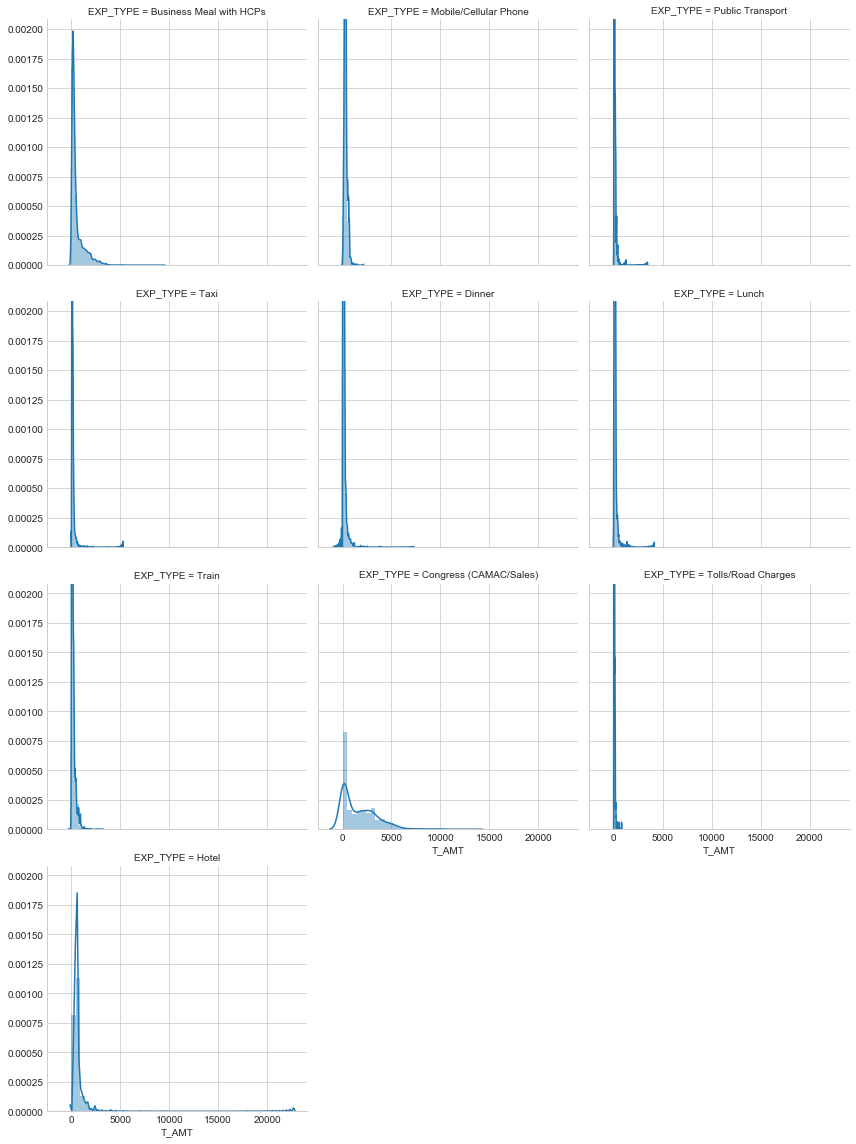

In [14]:
g = sns.FacetGrid(yf_df[yf_df.EXP_TYPE.isin(List)], col='EXP_TYPE', col_wrap=3, size=4)
# g.map(plt.hist, 'T_AMT', bins=4)
g.map(sns.distplot, 'T_AMT')


>From the whole company view the >90% transaction is from low area of the whole.
The max value could be normal, due to the ...

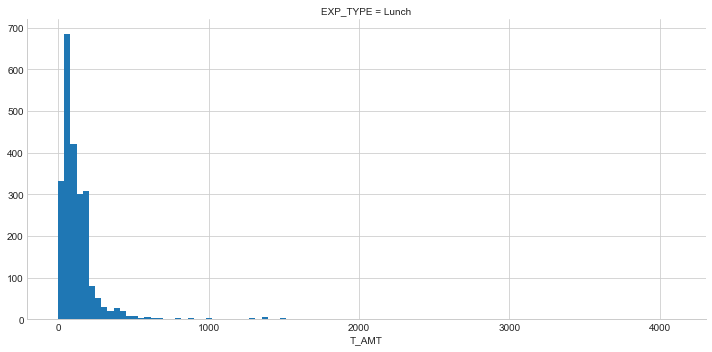

In [15]:
g = sns.FacetGrid(yf_df[yf_df.EXP_TYPE=='Lunch'], col='EXP_TYPE', col_wrap=1,size=5, aspect=2)
g.map(plt.hist, 'T_AMT', bins=100)


Text(0,0.5,'# of Clarm')

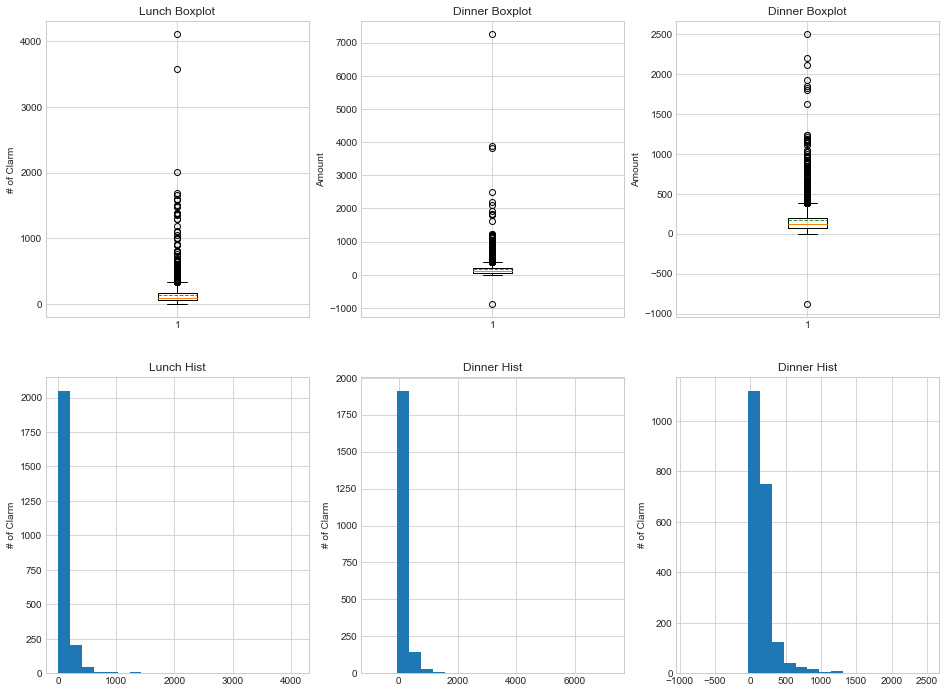

In [16]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(yf_df[yf_df.EXP_TYPE=='Lunch']['T_AMT'], showmeans = True, meanline = True)
plt.title('Lunch Boxplot')
plt.ylabel('# of Clarm')

plt.subplot(232)
plt.boxplot(yf_df[(yf_df.EXP_TYPE=='Dinner') & (yf_df.T_AMT>=-1000)]['T_AMT'],
            showmeans = True, meanline = True)
plt.title('Dinner Boxplot')
plt.ylabel('Amount')

plt.subplot(234)
plt.hist(yf_df[yf_df.EXP_TYPE=='Lunch']['T_AMT'], bins=20)
plt.title('Lunch Hist')
plt.ylabel('# of Clarm')

plt.subplot(235)
plt.hist(yf_df[(yf_df.EXP_TYPE=='Dinner') & (yf_df.T_AMT>=-1000)]['T_AMT'], bins=20)
plt.title('Dinner Hist')
plt.ylabel('# of Clarm')

plt.subplot(233)
plt.boxplot(yf_df[(yf_df.EXP_TYPE=='Dinner') & 
                  (yf_df.T_AMT>=-1000) & 
                  (yf_df.T_AMT<=3000)]['T_AMT'],
            showmeans = True, meanline = True)
plt.title('Dinner Boxplot')
plt.ylabel('Amount')

plt.subplot(236)
plt.hist(yf_df[(yf_df.EXP_TYPE=='Dinner') & 
               (yf_df.T_AMT>=-1000) & 
               (yf_df.T_AMT<=3000)]['T_AMT'], bins=20)
plt.title('Dinner Hist')
plt.ylabel('# of Clarm')



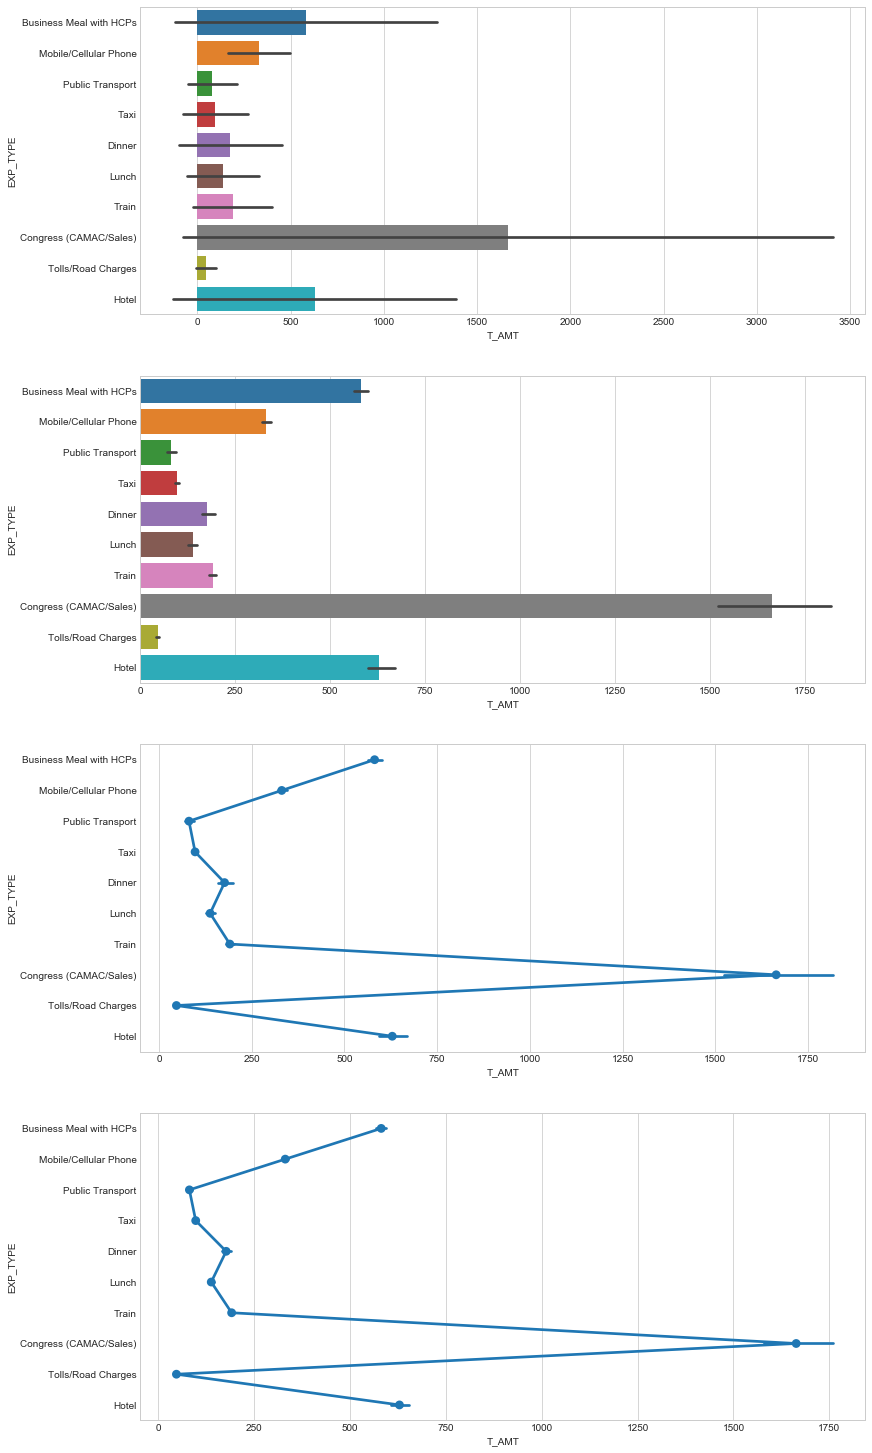

In [17]:
fig, saxis = plt.subplots(4, 1,figsize=(13,26))

sns.barplot(y = 'EXP_TYPE', x = 'T_AMT', data=yf_df[yf_df.EXP_TYPE.isin(List)], ax = saxis[0], ci="sd")
sns.barplot(y = 'EXP_TYPE', x = 'T_AMT', data=yf_df[yf_df.EXP_TYPE.isin(List)], ax = saxis[1], ci=99.99)
sns.pointplot(y = 'EXP_TYPE', x = 'T_AMT',  data=yf_df[yf_df.EXP_TYPE.isin(List)], ax = saxis[2], ci=99.9999)
sns.pointplot(y = 'EXP_TYPE', x = 'T_AMT',  data=yf_df[yf_df.EXP_TYPE.isin(List)], ax = saxis[3])


Text(0.5,1,'Pclass vs Age Survival Comparison')

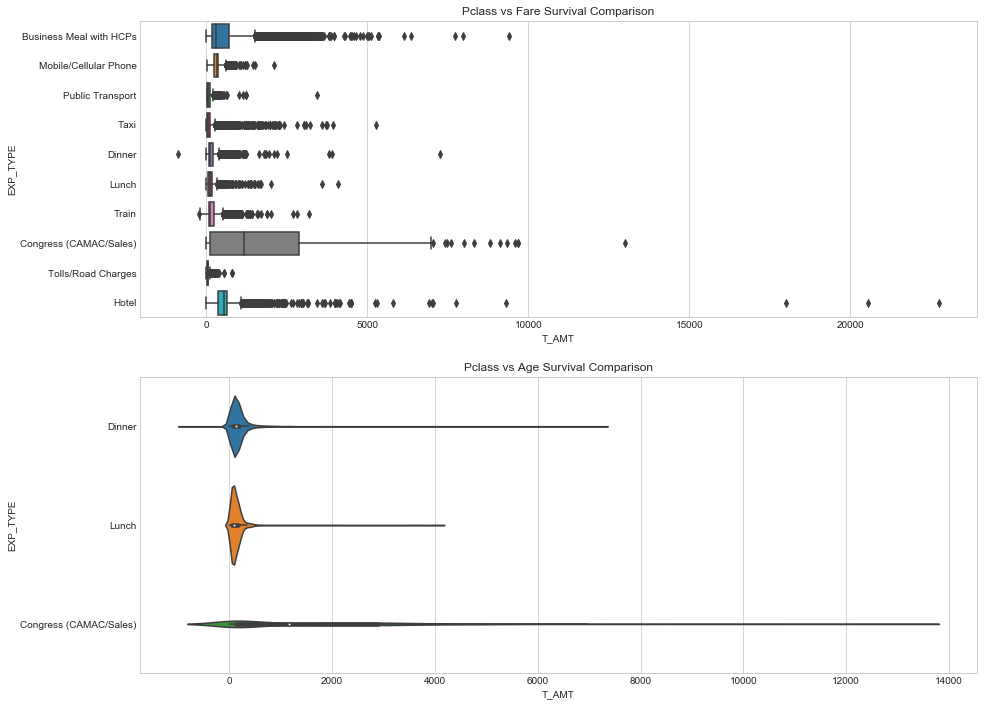

In [18]:
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,12))

data1 = DM_F_YF_CM_SRC_DF[DM_F_YF_CM_SRC_DF.EXP_TYPE.isin(List)]
data2 = DM_F_YF_CM_SRC_DF[DM_F_YF_CM_SRC_DF.EXP_TYPE.isin(['Lunch','Dinner','Congress (CAMAC/Sales)'])]

sns.boxplot(x = 'T_AMT', y = 'EXP_TYPE', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'T_AMT', y = 'EXP_TYPE', data = data2, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')



In [19]:
#plot distributions of Age of passengers who survived or did not survive

food_related_df = yf_df[(yf_df.EXP_TYPE=='Dinner') & 
                              (yf_df.T_AMT>=-1000) & 
                              (yf_df.T_AMT<=3000)]

food_related_df = food_related_df.append(yf_df[(yf_df.EXP_TYPE=='Lunch')], ignore_index=True)
food_related_df[['EXP_TYPE','T_AMT']].head()

,EXP_TYPE,T_AMT
0,Dinner,136.0
1,Dinner,72.0
2,Dinner,100.0
3,Dinner,204.0
4,Dinner,166.0


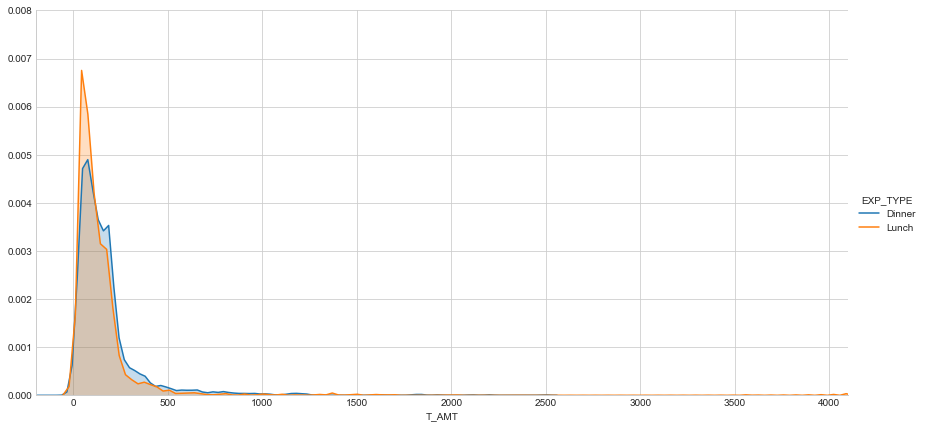

In [20]:
a = sns.FacetGrid( food_related_df, hue = 'EXP_TYPE', aspect=2 , size=6)
a.map(sns.kdeplot, 'T_AMT', shade= True )
# a.set(xlim=(0 , food_related_df['T_AMT'].max()))
a.set(xlim=(-200, food_related_df['T_AMT'].max()), ylim=(0,0.008))
a.add_legend()

In [21]:
# location list
# food_related_df.groupby(by='LOCATION_EN')['T_AMT'].count()
LOCATION_DF = food_related_df[['LOCATION_EN','T_AMT']].groupby(['LOCATION_EN'], as_index=False).count().\
    sort_values(by='T_AMT', ascending=False)
LOCATION_DF.head(20)

,LOCATION_EN,T_AMT
162,SHANGHAI,541
10,BEIJING,318
62,HANGZHOU,210
52,GUANGZHOU,196
205,XIAN,182
198,WUHAN,148
91,JINAN,101
134,NANJING,98
24,CHENGDU,95
178,SUZHOU,94


In [27]:
#histogram

Result = food_related_df[['LOCATION_EN','T_AMT']].groupby(['LOCATION_EN'], as_index=True).describe()
location_list = Result['T_AMT'][Result['T_AMT']['count']>100].index.tolist()
location_list
# plt.barplot(LOCATION_DF)



['BEIJING', 'GUANGZHOU', 'HANGZHOU', 'JINAN', 'SHANGHAI', 'WUHAN', 'XIAN']

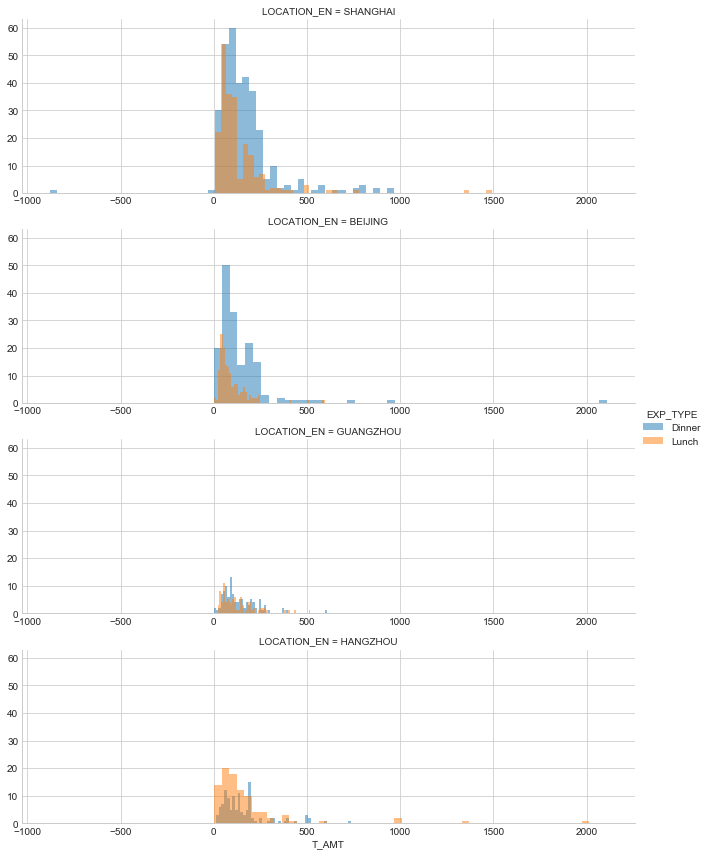

In [23]:
# exp_type_list = ['Dinner','Lunch']
exp_type_list = exp_list
location_list = ['SHANGHAI', 'BEIJING', 'HANGZHOU', 'GUANGZHOU' ]

h = sns.FacetGrid(food_related_df[food_related_df.LOCATION_EN.isin(location_list) &
                                    food_related_df.EXP_TYPE.isin(exp_type_list)],
                  row='LOCATION_EN',
                  # col='EXP_TYPE', 
                  hue='EXP_TYPE', size=3, aspect=3)
h.map(plt.hist, 'T_AMT', bins=50, alpha = .5)
h.add_legend()

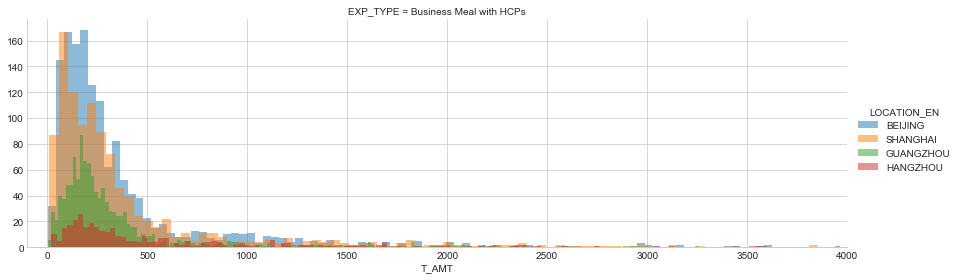

In [24]:
"""
['Business Meal with HCPs',
 'Congress (CAMAC/Sales)',
 'Dinner',
 'Hotel',
 'Individual Meals',
 'Lunch',
 'Mobile/Cellular Phone',
 'Public Transport',
 'Taxi',
 'Tolls/Road Charges',
 'Train']
"""

exp_type_list = ["Business Meal with HCPs"]
location_list = ['SHANGHAI', 'BEIJING', 'HANGZHOU', 'GUANGZHOU' ]

h = sns.FacetGrid(yf_df[yf_df.LOCATION_EN.isin(location_list) &
                                    yf_df.EXP_TYPE.isin(exp_type_list)],
                  row='EXP_TYPE',
                  # col='EXP_TYPE', 
                  hue='LOCATION_EN', size=4, aspect=3)
# h.map(sns.kdeplot, 'T_AMT', shade= True)
h.map(plt.hist, 'T_AMT', bins=200, alpha = .5)
h.set(xlim=(-100, 4000)
#       , ylim=(0,1000)
     )
h.add_legend()

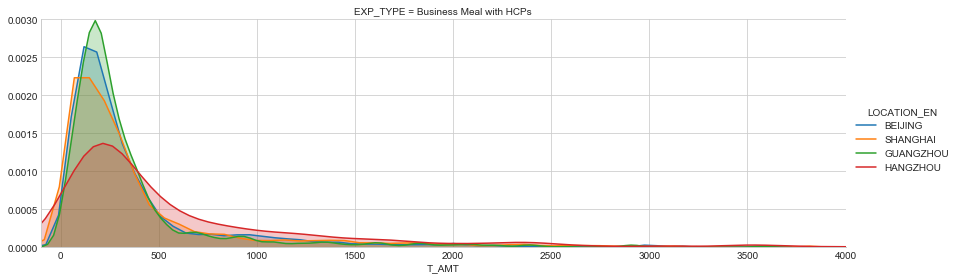

In [26]:
h = sns.FacetGrid(yf_df[yf_df.LOCATION_EN.isin(location_list) &
                                    yf_df.EXP_TYPE.isin(exp_type_list)],
                  row='EXP_TYPE',
                  # col='EXP_TYPE', 
                  hue='LOCATION_EN', size=4, aspect=3)
h.map(sns.kdeplot, 'T_AMT', shade= True)
# h.map(plt.hist, 'T_AMT', bins=200, alpha = .5)
h.set(xlim=(-100, 4000), ylim=(0,0.003)
     )
h.add_legend()

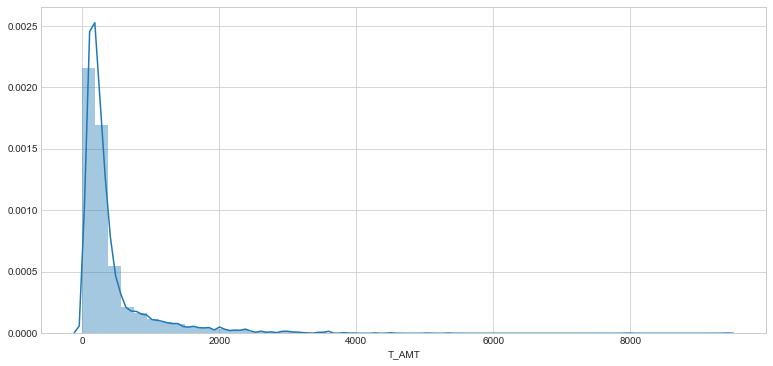

In [34]:
# histogram
exp_type_list = ["Business Meal with HCPs"]
location_list = ['SHANGHAI', 'BEIJING', 'HANGZHOU', 'GUANGZHOU' ]

fig, saxis = plt.subplots(figsize=(13,6))
sns.distplot(yf_df[yf_df.LOCATION_EN.isin(location_list) &
                                    yf_df.EXP_TYPE.isin(exp_type_list)]['T_AMT'], ax=saxis);

# The End

In [21]:
# Close the oracle db connection
connection.close()